<a href="https://colab.research.google.com/github/devkyle4/Machine-Learning/blob/main/weedclassification_resnet9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
conda install - c conda-forge ipywidgets

SyntaxError: ignored

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113


In [3]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install matplotlib-inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


`0- Chinee Apple
1- Lantana
2- Parkinsonia
3- Parthenium
4- Prickly Acacia
5- Rubber Vine
6- Siam Weed
7- Snake Weed
8- Other`

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
import torch
import torchvision
import matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision.io import read_image
from torchvision import transforms
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import pandas as pd
import numpy as np

#### Loading Dataset

In [8]:
data_dir = "/content/drive/MyDrive/DeepWeeds/"

#LOADING TRAINING DATAFRAME
train_labels_path = data_dir + "train_set_labels.csv"
train_df = pd.read_csv(train_labels_path)

train_df.head()

,Label,Species
0,20161207-111327-0.jpg,0
1,20170718-095159-2.jpg,0
2,20170811-133439-1.jpg,0
3,20170811-133752-1.jpg,0
4,20170217-114015-0.jpg,0


In [9]:
#LOADING TEST DATAFRAME
test_labels_path = data_dir + "test_set_labels.csv"
test_df = pd.read_csv(test_labels_path)
test_df.head()

,Label,Species
0,20160928-141107-0.jpg,0
1,20160928-141135-0.jpg,0
2,20161207-110730-0.jpg,0
3,20161207-110850-0.jpg,0
4,20161207-112015-0.jpg,0


In [10]:
train_df['Label'][0]

'20161207-111327-0.jpg'

In [11]:
img_path = data_dir + "deepweeds_images_256"

In [12]:
class WeedDataset(Dataset):

    def __init__(self, data_frame, root_dir, transform=None):
        self.data_frame = data_frame
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        # Return the length of the dataset
        return len(self.data_frame)

    def __getitem__(self, idx):
        # Return the observation based on an index. Ex. dataset[0] will return the first element from the dataset, in this case the image and the label.
        if torch.is_tensor(idx):
            idx = idx.tolist()

        #str(self.data_frame.iloc[idx, 1])
        img_name = os.path.join(self.root_dir, self.data_frame['Label'][idx])
        image = read_image(img_name)
        #image = Image.open(img_name)
        label = self.data_frame.iloc[idx, -1]

        if self.transform:
            image = self.transform(image)

        return (image, label)

In [13]:
DeepWeed = WeedDataset(
    train_df,
    img_path,
    transform=transforms.Compose([
        transforms.RandomResizedCrop(128),
        transforms.RandomHorizontalFlip(),
        transforms.ConvertImageDtype(dtype=torch.float32),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]))

In [14]:
DeepWeed[1000]

(tensor([[[0.0431, 0.0510, 0.2235,  ..., 0.3373, 0.2706, 0.4118],
          [0.0667, 0.1451, 0.2196,  ..., 0.6000, 0.2706, 0.3137],
          [0.1804, 0.2275, 0.1725,  ..., 0.6431, 0.3451, 0.3961],
          ...,
          [0.2235, 0.5176, 0.5608,  ..., 0.0745, 0.0078, 0.2510],
          [0.1373, 0.4745, 0.5412,  ..., 0.1451, 0.0431, 0.7020],
          [0.1804, 0.4863, 0.5843,  ..., 0.1216, 0.1176, 0.3176]],
 
         [[0.0824, 0.0941, 0.2784,  ..., 0.4196, 0.3451, 0.4667],
          [0.1373, 0.2118, 0.2863,  ..., 0.6824, 0.3412, 0.3608],
          [0.2824, 0.3216, 0.2510,  ..., 0.7137, 0.4039, 0.4353],
          ...,
          [0.2941, 0.6314, 0.7176,  ..., 0.2118, 0.1020, 0.3176],
          [0.1961, 0.5765, 0.6863,  ..., 0.2745, 0.1294, 0.7569],
          [0.2431, 0.5882, 0.7333,  ..., 0.2471, 0.2000, 0.3608]],
 
         [[0.0510, 0.0627, 0.2431,  ..., 0.3490, 0.2510, 0.3686],
          [0.0980, 0.1725, 0.2471,  ..., 0.6118, 0.2549, 0.2667],
          [0.2314, 0.2706, 0.2039,  ...,

In [15]:
img, label = DeepWeed[1000]
type(img), img.shape

(torch.Tensor, torch.Size([3, 128, 128]))

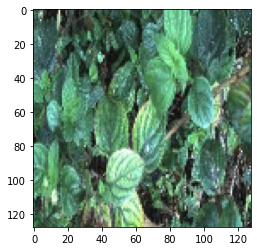

In [16]:
plt.imshow(img.permute(1, 2, 0))

In [17]:
def show_example(img, label):
    print('Label: ', "(" + str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))

Label:  (1)


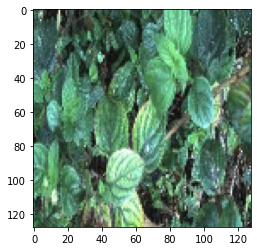

In [18]:
show_example(img, label)

### TRAINING AND VALIDATION DATASETS

In [19]:
random_seed = 42
torch.manual_seed(random_seed)

In [20]:
len(DeepWeed)

15007

In [21]:
val_size = 4500
train_size = len(DeepWeed) - val_size

train_ds, val_ds = random_split(DeepWeed, [train_size, val_size])
len(train_ds), len(val_ds)

(10507, 4500)

In [22]:
type(train_ds)

torch.utils.data.dataset.Subset

In [23]:
batch_size = 16
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size * 2)

In [24]:
img, label = DeepWeed[0]
img.shape

torch.Size([3, 128, 128])

In [25]:
def show_batches(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

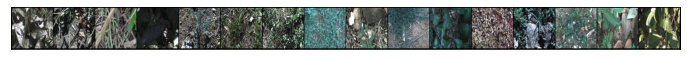

In [26]:
show_batches(train_dl)

### Defining the Model(RESNET9)

In [27]:
torch.cuda.empty_cache()

In [28]:
import torch.nn as nn
import torch.nn.functional as F

In [29]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1), nn.MaxPool2d(2, 2))

In [30]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([16, 3, 128, 128])
out.shape: torch.Size([16, 8, 64, 64])


In [31]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [32]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))     
    return nn.Sequential(*layers)


class Resnet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        #DEFINING THE RESNET9 ARCHITECTURE
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128,pool=True)
        self.res1 = nn.Sequential(conv_block(128,128), conv_block(128,128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512,512), conv_block(512,512))
        
        self.classifier = nn.Sequential(
                                       nn.MaxPool2d(16),
                                       nn.Flatten(),
                                       nn.Dropout(.2),
                                       nn.Linear(512,num_classes)
                                       )

        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out    

In [33]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [34]:
device = get_default_device()
device

device(type='cuda')

In [35]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [36]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

In [37]:
model = Resnet9(3,9)
model

Resnet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [38]:
to_device(model, device);

### Training Model

In [39]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None,opt_func=torch.optim.SGD):

    torch.cuda.empty_cache()
    history = []
    
    #SETUP CUSTOM OPTIMIZER WITH WEIGHT DECAY
    optimizer = opt_func(model.parameters(),max_lr,
                         weight_decay=weight_decay)
    
    #SETUP ONE CYCLE LEARNING RATE SCHEDULER
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr,
            epochs=epochs, steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            #Gradient Clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
                
            optimizer.step()
            optimizer.zero_grad()
            
            #Record and update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
            
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [50]:
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
%load_ext autotime

time: 106 µs (started: 2022-07-08 16:18:24 +00:00)


In [52]:
history = [evaluate(model, val_dl)]
history

[{'val_acc': 0.518927276134491, 'val_loss': 1.6478221416473389}]

time: 22.3 s (started: 2022-07-08 16:18:38 +00:00)


In [67]:
num_epochs = 10
max_lr = 0.0001
grad_clip = 0.1
opt_func = torch.optim.Adam 
weight_decay =1e-5

time: 1.33 ms (started: 2022-07-08 18:30:26 +00:00)


In [55]:
history += fit_one_cycle(num_epochs, max_lr, model, train_dl, val_dl, 
                        weight_decay=weight_decay, grad_clip=grad_clip, opt_func=opt_func)

Epoch [0], train_loss: 1.5408, val_loss: 1.3401, val_acc: 0.5680
Epoch [1], train_loss: 1.3138, val_loss: 1.2476, val_acc: 0.5822
Epoch [2], train_loss: 1.2572, val_loss: 1.5494, val_acc: 0.4969
Epoch [3], train_loss: 1.2026, val_loss: 1.0779, val_acc: 0.6146
Epoch [4], train_loss: 1.1169, val_loss: 1.1951, val_acc: 0.5803
Epoch [5], train_loss: 1.0428, val_loss: 0.9555, val_acc: 0.6664
Epoch [6], train_loss: 0.9503, val_loss: 0.8182, val_acc: 0.7157
Epoch [7], train_loss: 0.8610, val_loss: 0.7266, val_acc: 0.7615
Epoch [8], train_loss: 0.7853, val_loss: 0.6420, val_acc: 0.7736
Epoch [9], train_loss: 0.7170, val_loss: 0.6258, val_acc: 0.7923
time: 49min 15s (started: 2022-07-08 16:19:14 +00:00)


In [66]:
history += fit_one_cycle(num_epochs, max_lr, model, train_dl, val_dl, 
                        weight_decay=weight_decay, grad_clip=grad_clip, opt_func=opt_func)

Epoch [0], train_loss: 0.7192, val_loss: 0.6450, val_acc: 0.7822
Epoch [1], train_loss: 0.7210, val_loss: 0.6279, val_acc: 0.7843
Epoch [2], train_loss: 0.7122, val_loss: 0.6266, val_acc: 0.7807
Epoch [3], train_loss: 0.7052, val_loss: 0.6568, val_acc: 0.7806
Epoch [4], train_loss: 0.6833, val_loss: 0.6229, val_acc: 0.7915
Epoch [5], train_loss: 0.6573, val_loss: 0.5770, val_acc: 0.8039
Epoch [6], train_loss: 0.6224, val_loss: 0.5483, val_acc: 0.8046
Epoch [7], train_loss: 0.6108, val_loss: 0.5298, val_acc: 0.8182
Epoch [8], train_loss: 0.5777, val_loss: 0.5089, val_acc: 0.8309
Epoch [9], train_loss: 0.5780, val_loss: 0.5113, val_acc: 0.8267
time: 15min 9s (started: 2022-07-08 17:42:29 +00:00)


In [68]:
history += fit_one_cycle(num_epochs, max_lr, model, train_dl, val_dl, 
                        weight_decay=weight_decay, grad_clip=grad_clip, opt_func=opt_func)

Epoch [0], train_loss: 0.5641, val_loss: 0.5237, val_acc: 0.8241
Epoch [1], train_loss: 0.5944, val_loss: 0.5738, val_acc: 0.8078
Epoch [2], train_loss: 0.6273, val_loss: 0.5669, val_acc: 0.8025
Epoch [3], train_loss: 0.6350, val_loss: 0.5226, val_acc: 0.8234
Epoch [4], train_loss: 0.6076, val_loss: 0.5391, val_acc: 0.8167
Epoch [5], train_loss: 0.5910, val_loss: 0.5234, val_acc: 0.8205
Epoch [6], train_loss: 0.5569, val_loss: 0.5127, val_acc: 0.8265
Epoch [7], train_loss: 0.5317, val_loss: 0.4724, val_acc: 0.8371
Epoch [8], train_loss: 0.5163, val_loss: 0.4536, val_acc: 0.8460
Epoch [9], train_loss: 0.4993, val_loss: 0.4533, val_acc: 0.8424
time: 15min 9s (started: 2022-07-08 18:30:45 +00:00)


In [69]:
num_epochs = 10
max_lr = 0.001
grad_clip = 0.05
opt_func = torch.optim.SGD 
weight_decay =1e-5

time: 1.43 ms (started: 2022-07-08 18:45:54 +00:00)


In [70]:
history += fit_one_cycle(num_epochs, max_lr, model, train_dl, val_dl, 
                        weight_decay=weight_decay, grad_clip=grad_clip, opt_func=opt_func)

Epoch [0], train_loss: 0.5943, val_loss: 0.6596, val_acc: 0.7734
Epoch [1], train_loss: 0.8411, val_loss: 1.0267, val_acc: 0.6771
Epoch [2], train_loss: 0.9769, val_loss: 0.9282, val_acc: 0.6920
Epoch [3], train_loss: 0.9464, val_loss: 0.9808, val_acc: 0.6722
Epoch [4], train_loss: 0.8790, val_loss: 0.8316, val_acc: 0.7178
Epoch [5], train_loss: 0.8087, val_loss: 0.7920, val_acc: 0.7276
Epoch [6], train_loss: 0.7216, val_loss: 0.6879, val_acc: 0.7637
Epoch [7], train_loss: 0.6372, val_loss: 0.5506, val_acc: 0.8154
Epoch [8], train_loss: 0.5652, val_loss: 0.4698, val_acc: 0.8393
Epoch [9], train_loss: 0.5133, val_loss: 0.4498, val_acc: 0.8492
time: 15min 10s (started: 2022-07-08 18:45:54 +00:00)


In [71]:
num_epochs = 10
max_lr = 0.0001
grad_clip = 0.001
opt_func = torch.optim.SGD 
weight_decay =1e-5

time: 1.64 ms (started: 2022-07-08 19:44:00 +00:00)


In [ ]:
history += fit_one_cycle(num_epochs, max_lr, model, train_dl, val_dl, 
                        weight_decay=weight_decay, grad_clip=grad_clip, opt_func=opt_func)

Epoch [0], train_loss: 0.5217, val_loss: 0.4734, val_acc: 0.8404


def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None,opt_func=torch.optim.SGD)

In [56]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

time: 4.14 ms (started: 2022-07-08 17:36:56 +00:00)


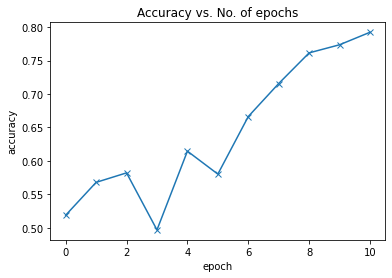

time: 158 ms (started: 2022-07-08 17:36:59 +00:00)


In [57]:
plot_accuracies(history)

In [58]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

time: 2.99 ms (started: 2022-07-08 17:36:59 +00:00)


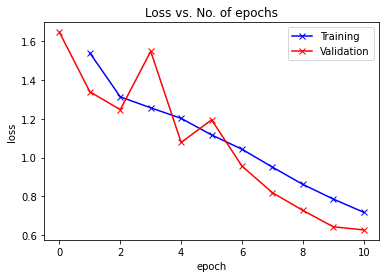

time: 145 ms (started: 2022-07-08 17:36:59 +00:00)


In [59]:
plot_losses(history)

In [60]:
def predict_image(img, model):
    # Convert to a batch of 1
    #xb = to_device(img.unsqueeze(0), device)
    xb = img.unsqueeze(0)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return preds[0].item()

time: 2.75 ms (started: 2022-07-08 17:37:00 +00:00)


In [61]:
test_weed = WeedDataset(
    test_df,
    img_path,
    transform=transforms.Compose([
        transforms.RandomResizedCrop(128),
        transforms.ConvertImageDtype(dtype=torch.float32),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]))

time: 2.22 ms (started: 2022-07-08 17:37:02 +00:00)


In [62]:
img, label = test_weed[1300]
label

8

time: 307 ms (started: 2022-07-08 17:37:03 +00:00)


RuntimeError: ignored

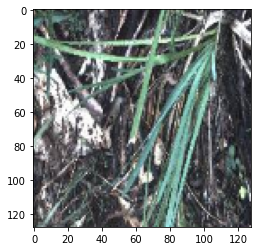

time: 218 ms (started: 2022-07-08 17:37:05 +00:00)


In [63]:
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:',label , ', Predicted:', predict_image(img, model))

In [ ]:
img, label = DeepWeed[0]
label

In [ ]:
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:',label , ', Predicted:', predict_image(img, model))